## -1. Подключение некоторых библиотек и совершение небольших настроек

In [1]:
import seaborn as sns  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 0. Описание задачи

Бинарная классификация музыки «***Станет ли песня хитом?***». Датасет содержит более 40 тысяч объектов, 18 признаков и целевую метку. На основе информации о собранной о песни необходимо определить будет ли песня популярной.

(Примечание от автора собравшего данные: автор объективно не считает трек неполноценным, плохим или провальным, если он помечен как «Flop». «Flop» здесь просто означает, что это трек, который, вероятно, не может считаться популярным в мейнстриме.)

Трек считается «провальным» если выполнены следующие условия:

- Трек не должен попадать в «хит-лист» этого десятилетия.
- Исполнитель трека не должен фигурировать в «хит-листе» того десятилетия.
- Трек должен принадлежать к жанру, который можно считать неосновным и / или авангардным.
- Жанр трека не должен иметь композицию в списке "хит".

Описание признаков, которые присутствуют в данных с простыми пояснениями.

- `track`: Название трека.

- `artist`: Имя артиста.

- `uri`: Идентификатор ресурса для трека.

- `danceability`: описывает, насколько подходит трек для танцев на основе комбинации музыкальных элементов, включая темп, стабильность ритма, силу удара и общую регулярность. Значение 0,0 наименее танцевально, а 1,0 - наиболее танцевально. 

- `energy`: является мерой от 0,0 до 1,0 и представляет собой меру интенсивности и активности. Обычно энергичные треки кажутся быстрыми, громкими и шумными. Например, дэт-метал обладает высокой энергией, а прелюдия Баха имеет низкие оценки по шкале. Характеристики восприятия, влияющие на этот атрибут, включают динамический диапазон, воспринимаемую громкость, тембр, скорость начала и общую энтропию. 

- `key`: Предполагаемая общая тональность трека. Целые числа отображаются на высоту звука с использованием стандартной записи класса высоты звука. Если ключ не обнаружен, значение равно -1.

- `loudness`: Общая громкость трека в децибелах (дБ). Значения громкости усредняются по всей дорожке и полезны для сравнения относительной громкости дорожек. Типичный диапазон значений от -60 до 0 дБ. 

- `mode`: указывает модальность (мажор или минор) трека, тип звукоряда, из которого получено его мелодическое содержание. Мажор представлен 1, а минор - 0.

- `speechiness`:  определяет наличие произнесенных слов в дорожке. Чем более похожа на речь запись (например, ток-шоу, аудиокнига, стихи), тем ближе значение атрибута к 1,0. 

- `acousticness`: Мера достоверности от 0,0 до 1,0 того, является ли трек акустическим. 1.0 означает высокую степень уверенности в том, что трек акустический.

- `instrumentalness`: Определяет, будет ли дорожка содержать вокал. В этом контексте звуки «ох» и «ааа» считаются инструментальными. Рэп или звуковые дорожки явно «вокальные». Чем ближе значение инструментальности к 1.0, тем больше вероятность, что трек не содержит вокального содержания. Значения выше 0,5 предназначены для представления инструментальных треков, но достоверность выше, чем ближе значение к 1,0. 

- `liveness`: Обнаруживает присутствие аудитории в записи. Более высокие значения живучести представляют собой повышенную вероятность того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек будет живым.

- `valence`: Мера от 0,0 до 1,0, описывающая музыкальную позитивность, передаваемую треком. Треки с высокой валентностью звучат более позитивно (например, счастливые, веселые, эйфорические), а треки с низкой валентностью - более негативные (например, грустные, подавленные, сердитые).

- `tempo`: Общий оценочный темп трека в ударах в минуту (BPM). В музыкальной терминологии темп - это скорость или темп данной пьесы, полученный непосредственно из средней продолжительности удара.

- `duration_ms`:  Продолжительность трека в миллисекундах.

- `time_signature`: Примерный общий размер трека. 

- `chorus_hit`: Это лучшая оценка автора того, когда начнется припев для трека. Это отметка времени начала третьей части трека. Эта функция была извлечена из данных, полученных вызовом API для анализа звука этой конкретной дорожки.

- `sections`: Количество секций на конкретной дорожке. Эта функция была извлечена из данных, полученных вызовом API для анализа звука этой конкретной дорожки. В музыке секция — это законченная, но не независимая, музыкальная идея. Секции включают в себя: вступление или интро, экспозицию, разработку, репризу, припев, хор или рефрен, заключение, коду или концовка, фейдер, бридж или интерлюдию. 

- `target`: Целевая переменная для трека. Это может быть "0" или "1". «1» означает, что эта песня фигурировала в еженедельном списке (выпущенном Billboards) треков Hot-100 за это десятилетие хотя бы один раз и, следовательно, является «хитом». «0» означает, что трек - «провал».

## 1. Загружаем данные

Загрузим данные и посмотрим на размерность полученной таблицы.

In [2]:
df_original = pd.read_csv('data.csv')
df_original.shape

(41106, 19)

Как видно, присутсвуют 41106 обьектов в таблице 18 признаков и одна целевая метка. 

В качестве первого ознакомление с данными можно посмотреть на первые строки таблицы.

In [3]:
df_original.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [4]:
df_original.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

Так как поля `track` и `uri` уникальные для каждого обьекта, то на их основе нет смысла пытаться строить какие-то выводы. 

В результате, изначально, удаляется два поля, для простоты дальнейшей обработки.

In [5]:
df_data = df_original.drop(columns=['track', 'uri'])
df_data.shape

(41106, 17)

## 2. Визуализация данных и вычисление основных характеристик

Как можно заметить из таблицы ниже, многие значения находятся в диапозоне от нуля до единицы, но не все. Есть несколько признаков, значения которых находятся в большом диапозоне, например, `duration_ms`, диапозон которого от 15 тысяч до 4170 тысяч. Это значит, что в будущем лучше нормализовать данные.

In [6]:
df_data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599793,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


Так как признаков много - 16 штук, считая признак с целовой меткой, то визуализация их всех сразу с помощью **pairplot** не имеет большого смысла, график получится сильно загромождённым. Поэтому, отдельно, вначале построены графики для некоторых признаков.

<AxesSubplot:xlabel='time_signature', ylabel='count'>

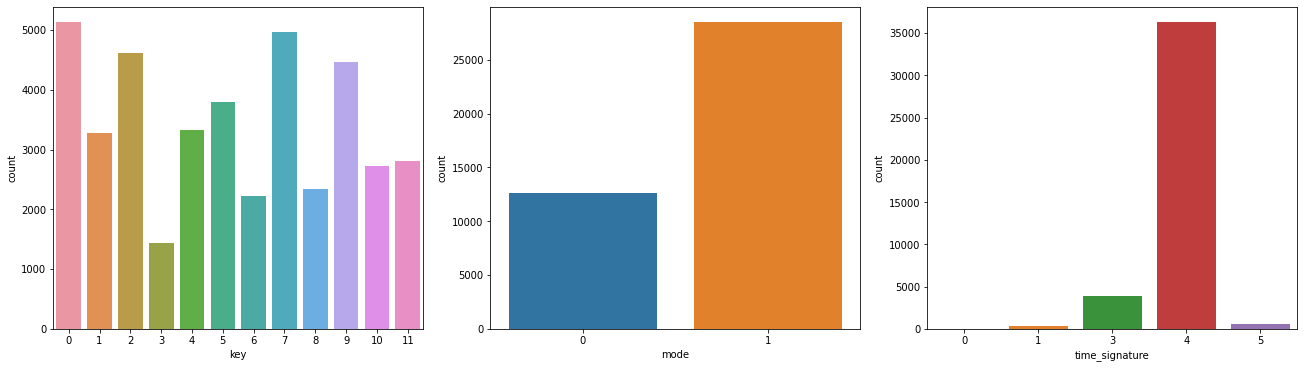

In [7]:
fig, ax = plt.subplots(1,3, figsize=(18,5), constrained_layout=True)

sns.countplot(x ='key', data = df_data, ax=ax[0])
sns.countplot(x ='mode', data = df_data, ax=ax[1])
sns.countplot(x ='time_signature', data = df_data, ax=ax[2])

Как видно из графика `time_signature` имеет мало значений, равных нулю, а именно всего три, и в целом, в осноном, принимает значение, равное четырём. Этот признак отвечает за примерный размер файла, как следует из описания, и лучше удалить такие обьекты из выборки, что будет сделано при борьбе с выбросами.

In [8]:
np.sum(df_data['time_signature'] == 0)

3

Также три признака `chorus_hit`, `sections`, `loudness` были визуализированны отдельно.

<AxesSubplot:xlabel='loudness', ylabel='Density'>

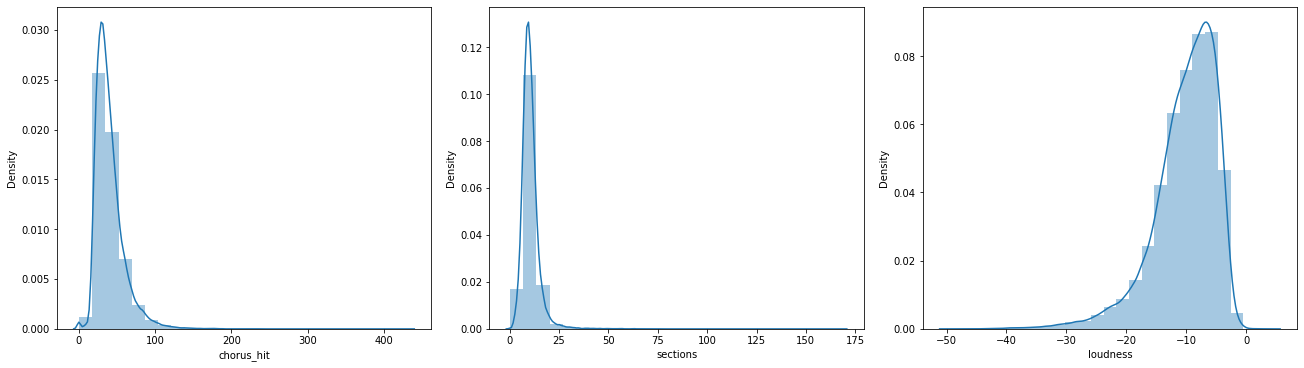

In [9]:
fig, ax = plt.subplots(1,3, figsize=(18,5), constrained_layout=True)

sns.distplot(df_data['chorus_hit'], bins=25, ax=ax[0])
sns.distplot(df_data['sections'], bins=25, ax=ax[1])
sns.distplot(df_data['loudness'], bins=25, ax=ax[2])

Признаки принимают большой диапозон значений, но при этом большие по модулю значения признаки принимают очень редко. Например, для признака `chorus_hit` значения больше 200 принимаются всего 12 раз, при том, что у нас больше 40_000 объектов.

In [10]:
np.sum(df_data['chorus_hit'] > 200)

12

Остальные признаки можно визуализировать с помощью **pairplot**. Для этого была сгенерированна случайная подвыборка для визуализации.

In [11]:
random_subset = np.random.choice(np.arange(df_data.shape[0]), size=1000, replace=False)

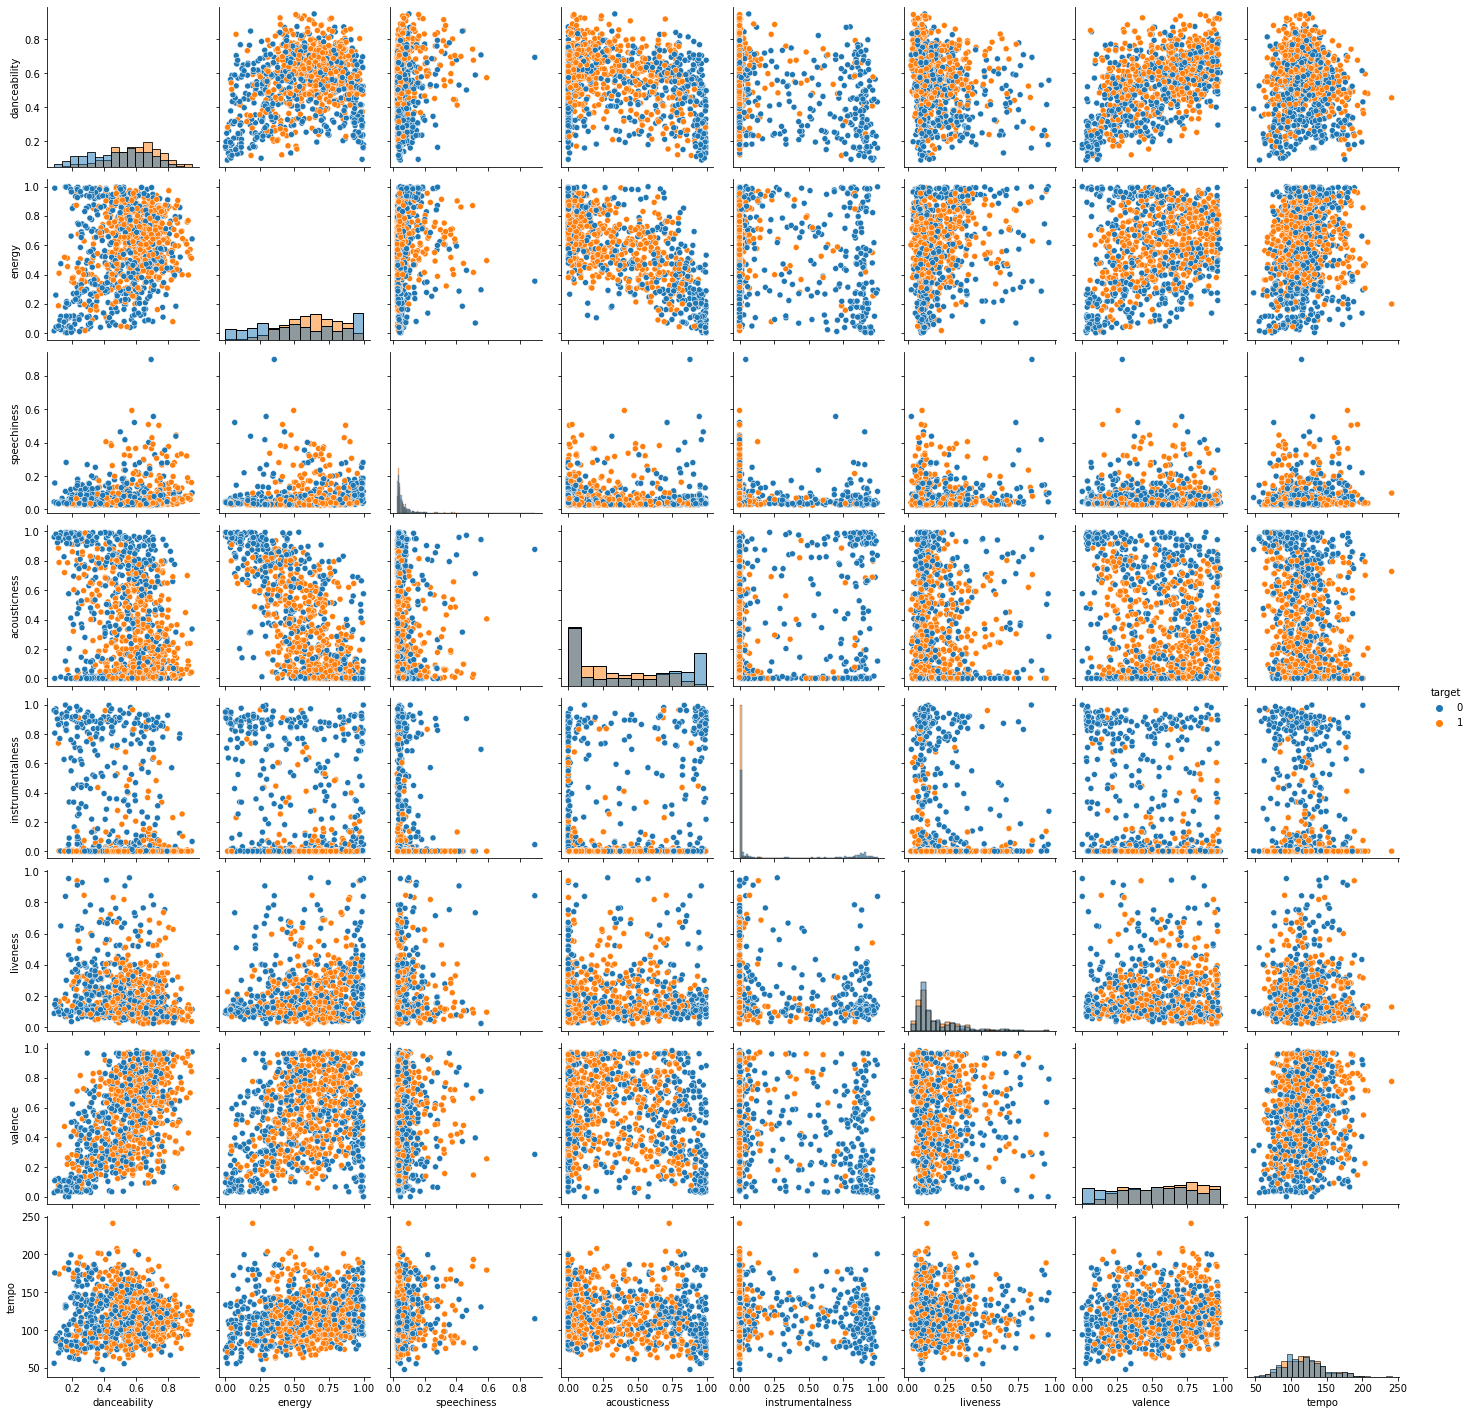

In [12]:
df_temp = df_data[['danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'target']]

sns.pairplot(df_temp.iloc[random_subset], diag_kind='hist', hue='target')

Внешне корреляция между признаками не наблюдается, возможно, потому что построены не все попарные варианты признаков, а, возможно, в силу отсутствия линейной зависимости. Для проверки этих гипотез была посчитана и построена матрица корреляции.

<AxesSubplot:>

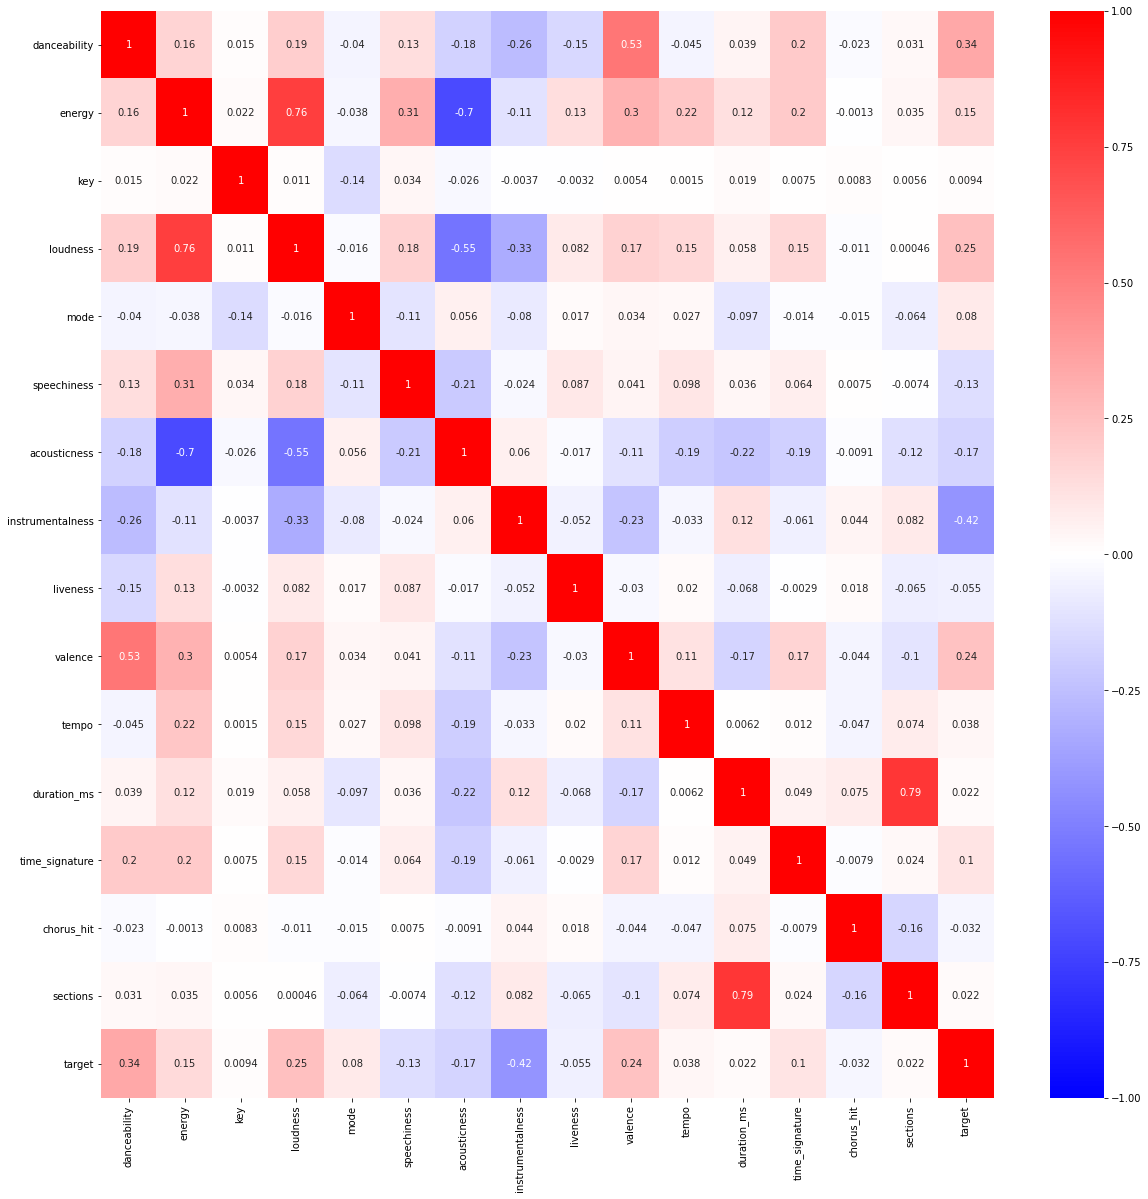

In [13]:
plt.rcParams['figure.figsize'] = (20, 20)

corr = df_data.corr(method='spearman')

sns.heatmap(corr, center=0, annot=True, cmap='bwr', vmin=-1, vmax=1,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Для удобства, можно отдельно вывести сочетания признаков, для которых корелляция является большой. Так как по матрице видно, что таких признаков мало, то выведены те признаки, коореляция между которыми больше 0,4 по модулю.

In [14]:
corr.where(np.triu((corr > 0.4) | (corr < -0.4), k=1)).stack().sort_values(ascending=False)

duration_ms       sections        0.785411
energy            loudness        0.755831
danceability      valence         0.534031
instrumentalness  target         -0.420482
loudness          acousticness   -0.545557
energy            acousticness   -0.704296
dtype: float64

`target` коррелирует с малым количеством признаков и именно сильной корреляции (более 0,5) не наблюдаются, в целом в данных мало коррелирующих признаков - всего у 4 пар признаков сильная корреляция. 

Отдельно можно построить график для `instrumentalness`. На нем видна небольшая зависимость. Так, если признак `instrumentalness` имеет большое значение, близкое к единице, то, скорее всего, песня провалится.

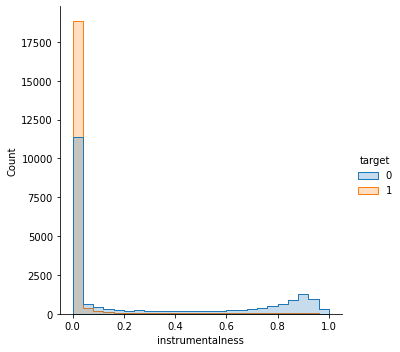

In [15]:
sns.displot(df_data, x='instrumentalness', bins=25, hue='target', element='step')

## 3. Борьба с выбросами
 
 
В процессе визуализации, некоторые признаки имели редкие, нетипичные значения, возможно, они являются выбросами.
Поэтому, для признаков `tempo`, `duration_ms`, `time_signature`, `chorus_hit`, `sections` отдельно можно построить **boxplot**. Другие признаки, на мой взгляд, не нужно чистить, потому что, мне кажется, их не стоит дополнительно обрабатывать.

<AxesSubplot:>

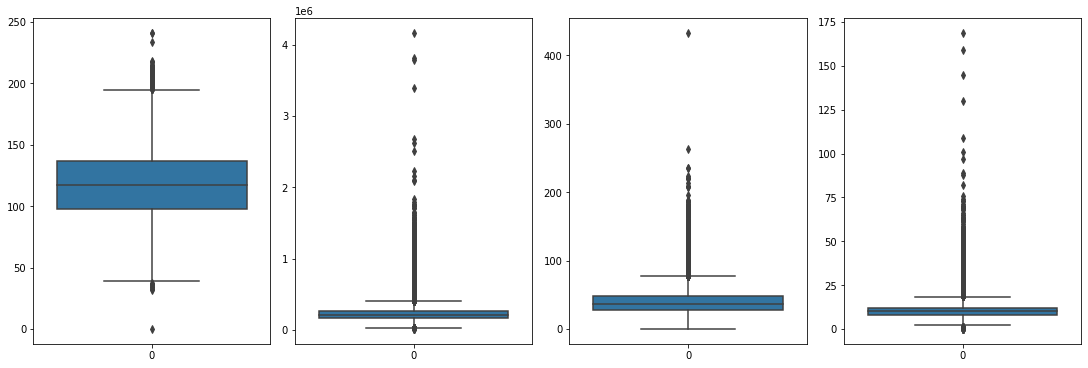

In [16]:
fig, ax = plt.subplots(1,4, figsize=(15,5), constrained_layout=True)

sns.boxplot(data=df_data['tempo'], ax=ax[0])
sns.boxplot(data=df_data['duration_ms'], ax=ax[1])
sns.boxplot(data=df_data['chorus_hit'], ax=ax[2])
sns.boxplot(data=df_data['sections'], ax=ax[3])

На **boxplot** видно, что эти признаки и правда содержат много нетипичных значений. Поэтому их можно удалить, например, используя информацию о квантилях.
Изначально, избавимся от объектов, у которых значение признака 'time_signature' равно нулю.

In [17]:
df_data = df_data.drop(df_data[(df_data['time_signature'] == 0)].index)
df_data.shape

(41103, 17)

In [18]:
columns_ = ['tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections']

flag = np.zeros(df_data.shape[0])

for col in columns_:
    flag = flag | (df_data[col] < df_data[col].quantile(0.005)) | (df_data[col] > df_data[col].quantile(0.995))

df_clean = df_data.drop(df_data[flag].index)

f"shape old data {df_data.shape}, shape new data {df_clean.shape}"

'shape old data (41103, 17), shape new data (39991, 17)'

Таким образом, после удаления выбросов, выборка уменьшилась примерно на тысячу.

## 4. Обработка пропущенных значений

В данных отсутвуют пропущенные значения, что видно из сводки ниже.

In [19]:
df_clean.isna().sum()

artist              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

## 5. Обработка категориальных признаков

В качестве категориальных признаков присутвуют `mode` и `artist`.

`mode` - бинарный признак, его можно оставить в таком состоянии, так как он уже закодирован нулем или единицей. Но лучше провести бинаризацию.

In [20]:
mode_ = pd.get_dummies(df_clean['mode'])
mode_ = mode_.rename(columns={0: 'minor'})
mode_ = mode_.rename(columns={1: 'major'}) 

Также были заменены в данных наименования столбцов на `minor` и `major` для большей понятности таблицы и именований признаков.

In [21]:
df_clean = pd.concat((df_clean, mode_), axis=1)
df_clean = df_clean.drop(['mode'], axis=1)

In [22]:
df_clean.head()

,artist,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,minor,major
0,Montgomery Gentry,0.578,0.471,4,-7.270,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1,0,1
1,Pretty Ricky,0.704,0.854,10,-5.477,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1,1,0
2,Candlemass,0.162,0.836,9,-3.009,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0,0,1
3,Zwartketterij,0.188,0.994,4,-3.745,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0,0,1
4,Billy Currington,0.630,0.764,2,-4.353,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1,0,1


In [23]:
df_clean['artist'].nunique()

11766

Так как признак `artist` содержит примерно 11 тысяч уникальных значений, то кодировать его простой бинаризацией не рационально. Поэтому кодируем их в базисе размерности 5 с помощью 7 новых признаков.

In [24]:
import category_encoders as ce

encoder = ce.BaseNEncoder(base=5)
artist_ = encoder.fit_transform(df_clean['artist'])
artist_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39991 entries, 0 to 41105
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   artist_0  39991 non-null  int64
 1   artist_1  39991 non-null  int64
 2   artist_2  39991 non-null  int64
 3   artist_3  39991 non-null  int64
 4   artist_4  39991 non-null  int64
 5   artist_5  39991 non-null  int64
 6   artist_6  39991 non-null  int64
dtypes: int64(7)
memory usage: 2.4 MB


In [25]:
df_clean = pd.concat((df_clean, artist_), axis=1)
df_clean = df_clean.drop(['artist'], axis=1)

In [26]:
df_clean.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,target,minor,major,artist_0,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6
0,0.578,0.471,4,-7.270,0.0289,0.368000,0.00000,0.159,0.532,133.061,...,1,0,1,0,0,0,0,0,0,1
1,0.704,0.854,10,-5.477,0.1830,0.018500,0.00000,0.148,0.688,92.988,...,1,1,0,0,0,0,0,0,0,2
2,0.162,0.836,9,-3.009,0.0473,0.000111,0.00457,0.174,0.300,86.964,...,0,0,1,0,0,0,0,0,0,3
3,0.188,0.994,4,-3.745,0.1660,0.000007,0.07840,0.192,0.333,148.440,...,0,0,1,0,0,0,0,0,0,4
4,0.630,0.764,2,-4.353,0.0275,0.363000,0.00000,0.125,0.631,112.098,...,1,0,1,0,0,0,0,0,1,0


В результате, проведена обработка некатегориальных признаков, при этом получено 9 новых признаков, заменяющих 2 старых категориальных.

## 6. Нормализация количественных признаков

Анализируемые признаки находятся в разных числовых диапазонах, для точности применяемых алгоритмов машинного обучения, их лучшей и более качественной работы, перед применением алгоритмов  количественные признаки должны быть нормализованы. В качестве алгоритма нормализации будем использовать стандартизацию признаков.

In [27]:
list_col = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections']

df_data = df_clean.copy()
df_data[list_col] = df_data[list_col].apply(lambda x: (x - np.mean(x)) / (np.std(x)))
df_data.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,target,minor,major,artist_0,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6
count,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,...,39991.000000,39991.000000,39991.000000,39991.0,39991.000000,39991.000000,39991.000000,39991.000000,39991.000000,39991.000000
mean,-2.842811e-16,2.729098e-16,-6.929351e-17,-7.533448e-17,-2.274248e-17,-2.558530e-16,7.640053e-18,-1.481815e-16,-2.629600e-17,4.473873e-16,...,0.508289,0.305819,0.694181,0.0,1.293716,1.982971,1.955490,2.019704,1.994124,1.981771
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,...,0.499938,0.460759,0.460759,0.0,0.983205,1.534201,1.398699,1.394596,1.413078,1.406747
min,-2.750401e+00,-2.327115e+00,-1.475213e+00,-7.478609e+00,-6.059056e-01,-1.067241e+00,-4.991006e-01,-1.092207e+00,-2.058680e+00,-2.041948e+00,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.666591e-01,-7.234782e-01,-9.097428e-01,-4.938424e-01,-4.653245e-01,-9.532277e-01,-4.991006e-01,-6.217742e-01,-7.973434e-01,-7.662319e-01,...,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,7.104919e-02,8.682434e-02,-6.153704e-02,1.804566e-01,-3.477695e-01,-3.190260e-01,-4.987460e-01,-4.002229e-01,6.111834e-02,-5.732728e-02,...,1.000000,0.000000,1.000000,0.0,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,7.236373e-01,8.212858e-01,7.866687e-01,7.236419e-01,-3.025005e-02,9.101852e-01,-3.319876e-01,3.470037e-01,8.405112e-01,5.996084e-01,...,1.000000,1.000000,1.000000,0.0,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000
max,2.522511e+00,1.663521e+00,1.634874e+00,2.650593e+00,1.071330e+01,1.889991e+00,2.846505e+00,4.641376e+00,1.691443e+00,2.937199e+00,...,1.000000,1.000000,1.000000,0.0,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000


При этом признаки полученные из признака `artist` просто центрируем и отнормируем с помощью вычитания 2 и деления на 2, для приведения в диапазон от -1 до 1. 

In [28]:
temp_ = ['artist_1', 'artist_2', 'artist_3',
       'artist_4', 'artist_5', 'artist_6']
df_data[temp_] = df_data[temp_].apply(lambda x: (x - 2) / 2)
df_data.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,target,minor,major,artist_0,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6
count,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,3.999100e+04,...,39991.000000,39991.000000,39991.000000,39991.0,39991.000000,39991.000000,39991.000000,39991.000000,39991.000000,39991.000000
mean,-2.842811e-16,2.729098e-16,-6.929351e-17,-7.533448e-17,-2.274248e-17,-2.558530e-16,7.640053e-18,-1.481815e-16,-2.629600e-17,4.473873e-16,...,0.508289,0.305819,0.694181,0.0,-0.353142,-0.008514,-0.022255,0.009852,-0.002938,-0.009115
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,...,0.499938,0.460759,0.460759,0.0,0.491602,0.767101,0.699349,0.697298,0.706539,0.703374
min,-2.750401e+00,-2.327115e+00,-1.475213e+00,-7.478609e+00,-6.059056e-01,-1.067241e+00,-4.991006e-01,-1.092207e+00,-2.058680e+00,-2.041948e+00,...,0.000000,0.000000,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-6.666591e-01,-7.234782e-01,-9.097428e-01,-4.938424e-01,-4.653245e-01,-9.532277e-01,-4.991006e-01,-6.217742e-01,-7.973434e-01,-7.662319e-01,...,0.000000,0.000000,0.000000,0.0,-1.000000,-0.500000,-0.500000,-0.500000,-0.500000,-0.500000
50%,7.104919e-02,8.682434e-02,-6.153704e-02,1.804566e-01,-3.477695e-01,-3.190260e-01,-4.987460e-01,-4.002229e-01,6.111834e-02,-5.732728e-02,...,1.000000,0.000000,1.000000,0.0,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.236373e-01,8.212858e-01,7.866687e-01,7.236419e-01,-3.025005e-02,9.101852e-01,-3.319876e-01,3.470037e-01,8.405112e-01,5.996084e-01,...,1.000000,1.000000,1.000000,0.0,0.000000,1.000000,0.500000,0.500000,0.500000,0.500000
max,2.522511e+00,1.663521e+00,1.634874e+00,2.650593e+00,1.071330e+01,1.889991e+00,2.846505e+00,4.641376e+00,1.691443e+00,2.937199e+00,...,1.000000,1.000000,1.000000,0.0,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000


## 7. Разделение выборки

Для контроля за переобучением моделей машинного обучения разделим выборку данных на две: одну для обучения, другую для тестирования в пропорции 1 к 3.

In [29]:
data_x = np.array(df_data.drop(['target'], axis=1))
data_y = np.array(df_data['target'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.25, random_state = 42)

f"shape train data {x_train.shape}, shape test data {x_test.shape}"

'shape train data (29993, 23), shape test data (9998, 23)'

## 8. Классификатор ближайших соседей 

Запустим метод **kNN** на разных значениях *k* и построим график зависимости точности на обучающей и контрольной выборке от числа ближайших соседей. Запуск делается для разное количество от 1 до 51 с шагом два.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import parallel_backend
from sklearn.metrics import f1_score
from tqdm import tqdm

target_names = ['Flop', 'Hit']

y_train_pred = []
y_test_pred = []

iter_ = range(1, 51, 2)

for n_neig in tqdm(iter_):
    neigh = KNeighborsClassifier(n_neighbors=n_neig)
    neigh.fit(x_train, y_train)
    
    y_train_pred.append(neigh.predict(x_train))
    y_test_pred.append(neigh.predict(x_test))

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [28:11<00:00, 67.64s/it]


Из собранных предсказанний на тестовой выборки найдем оптимальное количество ближайших соседей. Важно выбрать минимум именно на тестовой выборке, так как модель переобучится на тестовых данных и нельзя выбирать оптимальное количество на тренировочной выборке.

Оптимальном является девять ближайших соседей.

'best number of neighbors: 9'

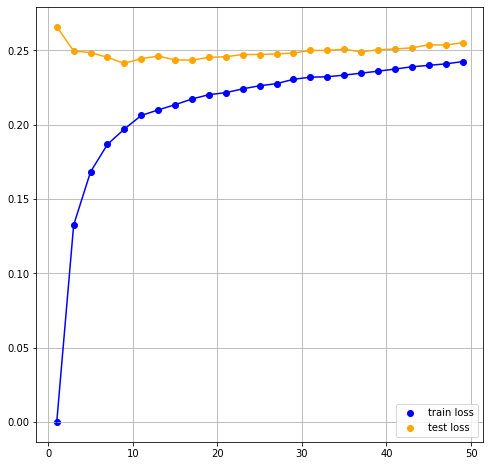

In [31]:
plt.rcParams['figure.figsize'] = (8, 8)

res_train = []
res_test = []

for i in range(len(iter_)):
    res_train.append(np.mean(y_train != y_train_pred[i]))
    res_test.append(np.mean(y_test != y_test_pred[i]))

plt.scatter(list(iter_)[::-1], res_train[::-1], color='blue', label='train loss')
plt.scatter(list(iter_)[::-1], res_test[::-1], color='orange', label='test loss')

plt.plot(list(iter_)[::-1], res_train[::-1], color='blue')
plt.plot(list(iter_)[::-1], res_test[::-1], color='orange')

plt.grid()
plt.legend()
f"best number of neighbors: {np.argmin(res_test)*2 + 1}"

Также дополнительно можно посчитать **F1 score (F1 мера)**. В результате получилось точность *F1 = 0.78* и ошибка равна *24%*.

In [32]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(x_train, y_train)

y_pred = neigh.predict(x_test)
f"F1: {f1_score(y_test, y_pred):.3f}, error: {np.mean(y_test != y_pred):.3f}"

'F1: 0.788, error: 0.241'

Были опробованы разное количество ближайших соседей для метода ближайщих соседей. Наилучашая точность была достигнута при **9 соседях**, в этом случае точность *76%*.

## Дополнительные задания

В качестве дополнительных методов были попробованы **метод линейной классификации** и **SVM**. Дополнительно рассчитывалась метрика **F1 score (F1 мера)** (также считалась и для **kNN**).

In [33]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(max_iter=1000, tol=1e-3, alpha=0.001)

clf.fit(x_train, y_train)

у_pred = clf.predict(x_test)
f"f1: {f1_score(y_test, у_pred):.3f}, error: {np.mean(y_test != у_pred):.3f}"

'f1: 0.760, error: 0.279'

Линейный классификатор работает с точностью примерно *72%*, что хуже на *3.5%* чем метод *k* ближайших соседей.

Для выбора параметра метода опорных векторов можно использовать метод **GridSearchCV** для выбора оптимального параметра **C**, который отвечает за L2 регуляризацию. Для ускорения работы используется возможность запускать модели машинного обучения в **sklearn** в несколько параллельных потоков.


In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.linspace(1, 25, 7)}

svc = SVC(kernel = 'rbf')
clf = GridSearchCV(svc, parameters, verbose=0)
with parallel_backend('threading', n_jobs=2):
    clf.fit(x_train, y_train)

Как можно видеть из сводки ниже, оптимальное значение параметра *C = 9.0*. В таком случае, **ошибка** метода с такими параметрами примерно *20%*, что лучше других методов. **F1 мера** во всех примерах приблизительно равна *1-error*, так как классы сбалансированы.

In [35]:
print(clf.best_estimator_)
print(clf.best_score_)

SVC(C=9.0)
0.7974529043714689


In [36]:
clf = SVC(C=9, kernel = 'rbf')
clf.fit(x_train, y_train.ravel())

у_pred = clf.predict(x_test)
f"f1: {f1_score(y_test, у_pred):.3f}, error: {np.mean(y_test != у_pred):.3f}"

'f1: 0.812, error: 0.203'

Метод опорных векторов показывает ошибку меньше на *7%* по сравнению с методом ближайших соседей.

## Общие выводы

В результате был проанализирован датасет ***The Spotify Hit Predictor***, визуализированы данные. 
- 1.Отсутсвует сильная корреляция признаков и результирующей метки. 
- 2.Некоторые признаки содержали выбросы, поэтому было проведено удаление выбросов. 
- 3.Обработаны категориальные признаки. 
- 4.Проведена нормализация признаков, для наилучшей работы алгоритмов машинного обучения. 
- 5.Обучено несколько различных классификаторов с разными параметрами, а именно линейная классификация, метод ближайших - соседей, метод опорных векторов. 
- 6.Наилучшая достигнутая точность была получена на методе опорных векторов и равна примерно *80%*, при наилучшей точности для метода ближайших соседе.

## Применение LDA и PCA

## Визуализация данных с помощью LDA и PCA 

Для обработки данных методом LDA используется библиотека sklearn. Так как в задаче лишь два класса результатом будет один новый признак.

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [38]:
lda = LDA()
lda.fit(x_train, y_train.ravel()).transform(x_train)

x_train_lda = lda.transform(x_train)
x_test_lda = lda.transform(x_test)

y_train_pd = y_train.reshape(y_train.shape[0], 1)
data = np.concatenate([x_train_lda, y_train_pd], axis=1)

Можно изобразить полученный признак с помощью графика, который построен ниже, часто используемый в таких случаях. А также, была добавлена прямая, полученная логистической регрессией, без какой либо цели, просто интересно, что будет. Как можно заметить, данные плохо разделимы, как визуально, так и с помощью логистической кривой.

In [39]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

clf = LogisticRegression(random_state=0).fit(x_train_lda, y_train)

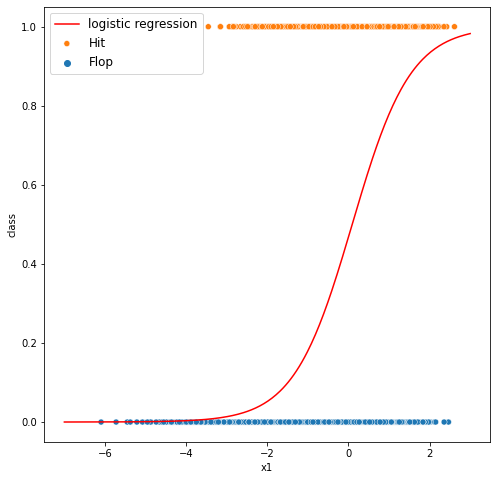

In [40]:
plt.rcParams['figure.figsize'] = (8, 8)

df = pd.DataFrame(data=data, columns=["x1", 'class'])

X_test = np.linspace(-7, 3, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
sns.scatterplot(data=df, x="x1", y="class", hue="class")
plt.plot(X_test, loss, color="red")
plt.legend(("logistic regression", "Hit", "Flop"), fontsize=12)

С помощью метода главных компонент были найдены две главные компоненты для визуализации данных.

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

y_train_pd = y_train.reshape(y_train.shape[0], 1)
data = np.concatenate([x_train_pca, y_train_pd], axis=1)

Как видно из графика ниже, использование двух главных компонент явно приводит к плохому результату. Зрительно данные не разделимы ни одной из функций, которые могут прийти на ум. Хотя и возможно разделение с плохой точностью, явно меньшей, чем при использовании всех признаков.

<AxesSubplot:xlabel='x1', ylabel='x2'>

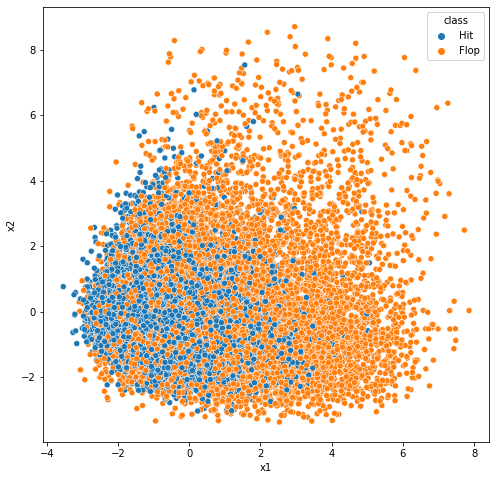

In [42]:
plt.rcParams['figure.figsize'] = (8, 8)

df = pd.DataFrame(data=data, columns=["x1", 'x2', 'class'])
df.loc[df['class'] == 0, 'class'] = 'Flop'
df.loc[df['class'] == 1, 'class'] = 'Hit'

sns.scatterplot(data=df, x="x1", y="x2", hue="class")

## Предобработка данных с помощью PCA для классификатора SVM 

Для понижения размерности данных будет использоваться метод главных компонент со всеми возможными количествами главных компонент. Был организован перебор с сохранением данных для всех количеств компонент от 1 до 23 включительно.

In [43]:
from sklearn.svm import SVC
from tqdm import tqdm

acc_train = []
acc_test = []

for i in tqdm(range(1, 24)):
    pca = PCA(n_components=i)
    pca.fit(x_train)

    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)
    
    clf = SVC(C=9, kernel='rbf')
    clf.fit(x_train_pca, y_train.ravel())
    
    у_pred_train = clf.predict(x_train_pca)
    у_pred_test = clf.predict(x_test_pca)
    
    acc_train.append(np.mean(y_train != у_pred_train))
    acc_test.append(np.mean(y_test != у_pred_test))

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [28:59<00:00, 75.61s/it]


Как видно из графика ниже, чем больше используется главных компонент, тем лучше точность, что было ожидаемо. При этом использование более чем 18 компонент не дает результата, точность в таком случае изменяется менее чем на десятую часть процента. Использование 21 компонента достаточно для максимальной достижимой точности с помощью **PCA** и **SVM**. Использование большего числа не приводит хоть к какому-то улучшению точности на тестовой выборки. 

При этом точность не удается улучшить. Это может быть связано с тем, что исходные признаки слабо коррелированы и используется достаточности сильным метод классификации - метод опорных векторов с rbf ядром.

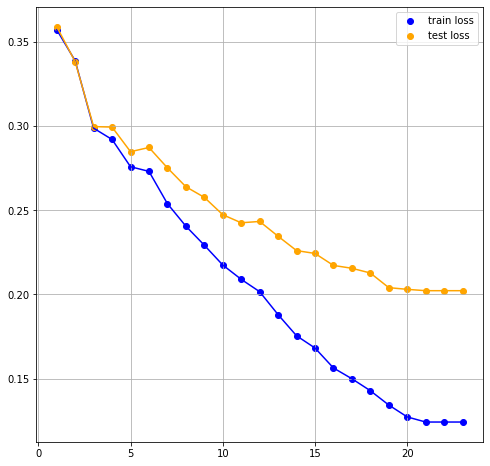

In [44]:
plt.scatter(range(1,24), acc_train, label='train loss', color='blue')
plt.scatter(range(1,24), acc_test, label='test loss', color='orange')

plt.plot(range(1,24), acc_train, color='blue')
plt.plot(range(1,24), acc_test, color='orange')
plt.legend()
plt.grid()

Дополнительно можно вывести значения подсчитанных ошибок от числа главных компонент, для более детального рассмотрения значений.

In [45]:
pd.set_option('display.max_columns', 25)
pd.DataFrame(acc_test, index=range(1,24)).T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.358972,0.338168,0.29966,0.29936,0.284757,0.287257,0.275155,0.263953,0.257652,0.247349,0.242549,0.243349,0.234547,0.226045,0.224345,0.217243,0.215543,0.212743,0.204041,0.203041,0.20224,0.20224,0.20224


## Общие выводы использования понижения размерности

В результате для датасета ***The Spotify Hit Predictor*** были применены методы **LDA** и **PCA** для визуализации. С помощью метода **PCA** была опробована возможность понижения размерности для улучшения точности алгоритма **SVM**.


- 1.Использован метод **LDA** для визуализации данных в одномерном пространстве признаков. Графически в таком случае данные не выглядят, разделимы с хорошей точностью в силу слишком сильного понижения размерности и сложности (нелинейности) задачи.

- 2.Использование метода главных компонент также не позволяет наглядно визуализировать данные. 

- 3.**PCA** не позволяет улучшить точность алгоритма **SVM**, разница лишь в сотые процента в точности, точность сохраняется на уровне *20%* ошибки.

- 4.При использовании *21* главных компонент точность достигнет максимального значения, использование остальных новых признаков  никак не повлияет на точность.